In [16]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, stanford_mir
%matplotlib inline

[&larr; Back to Index](index.html)

# Cross Validation

<a href="https://en.wikipedia.org/wiki/Cross-validation_(statistics)">K-fold cross validation</a> is a method for evaluating the correctness of a classifier.

For example, with 10-fold cross validation:

1. Divide the data set into 10 random partitions.
2. Choose one of the partitions as the test set. Train on the other nine partitions.
3. Repeat for the partitions.

Why cross validation is good?
* In K-fold cross validation, evaluation on models can be done K times, but each time on a different partition of the data. 
* It can be used to tune parameters and to choose the best model and/or features.

### Setup Data

Load some features from ten kick drums and ten snare drums:
* training_features is a 2 dimensional vector with zero crossing rate and spectral centroids as features of drum samples.

In [17]:
training_features, training_labels, scaler = stanford_mir.get_features()

In [18]:
print training_features
print training_labels

[[-0.56578947  0.2490469 ]
 [-0.92105263 -0.63084112]
 [-1.         -1.        ]
 [-1.          0.32776395]
 [-0.77631579 -0.55766302]
 [-0.96052632 -0.69890631]
 [-0.68421053 -0.6353643 ]
 [-0.73684211 -0.10209073]
 [-0.82894737 -0.38692759]
 [-0.69736842 -0.5365142 ]
 [ 0.53947368  0.89837486]
 [ 0.63157895  0.55248334]
 [ 1.          0.99378504]
 [ 0.93421053  1.        ]
 [ 0.85526316  0.87391641]
 [ 0.89473684  0.96797404]
 [ 0.23684211  0.86119147]
 [ 0.97368421  0.79526304]
 [ 0.40789474  0.38793404]
 [ 0.88157895  0.88600432]]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


Plot their features:

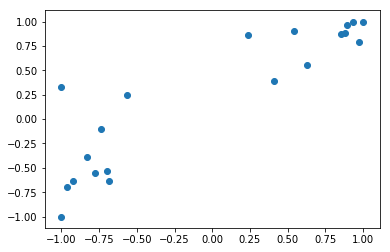

In [19]:
plt.scatter(training_features[:,0], training_features[:,1])

### Load model and perform cross-validation

Initialize the K-Nearest Neighbor classifier:
* Note that K=3 here (3 neighbors), but K is so-called a hyperparameter, which can be tuned to select the best value (We will get to that below!)

In [20]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)

Perform 5-fold cross validation (cv=5):

In [21]:
acc  = sklearn.model_selection.cross_val_score(model, training_features, training_labels, cv=5)

In [22]:
print acc
print acc.mean()

[ 1.  1.  1.  1.  1.]
1.0


### Tuning parameter K

Since value of K has been arbitrarily chosen, we do not know whether it was the best choice (although here in this example, we have a perfect score anyway...). 
Therefore, testing the result with several other values will help to choose the best parameter.

In [23]:
K_choices = [1,2,3,4,5]
for k in K_choices:
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    mean_score = sklearn.model_selection.cross_val_score(model, training_features, training_labels, cv=5).mean()
    print "[K=%d] Accuracy=%.3f"%(k, mean_score)

[K=1] Accuracy=1.000
[K=2] Accuracy=1.000
[K=3] Accuracy=1.000
[K=4] Accuracy=1.000
[K=5] Accuracy=1.000


### Bonus : Try out other models and perform cross validations to find the best model!

In [24]:
# Logistic regression for binary classification
model = sklearn.linear_model.LogisticRegression()

[&larr; Back to Index](index.html)